In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import utils

In [4]:
%cd ..
%ls ./data

/home/den/dev/git/time-series-analysis/final-task
shop_sales.csv  shop_sales_dates.csv  shop_sales_prices.csv


# EDA

In [ ]:
sales = pd.read_csv("./data/shop_sales.csv")
dates = pd.read_csv("./data/shop_sales_dates.csv")
prices = pd.read_csv("./data/shop_sales_prices.csv")

In [ ]:
utils.pretty_info(sales, "sales")
utils.pretty_info(dates, "dates")
utils.pretty_info(prices, "prices")

sales:
  Columns: ['item_id', 'store_id', 'date_id', 'cnt']
  Rows: 81855
--------------------------------------------------
dates:
  Columns: ['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'date_id', 'CASHBACK_STORE_1', 'CASHBACK_STORE_2', 'CASHBACK_STORE_3']
  Rows: 1819
--------------------------------------------------
prices:
  Columns: ['store_id', 'item_id', 'wm_yr_wk', 'sell_price']
  Rows: 11141
--------------------------------------------------


Далее буду работать с магазином `store_id = STORE_1`.

In [ ]:
sales = sales[sales["store_id"] == "STORE_1"]
dates.drop(columns=["CASHBACK_STORE_2", "CASHBACK_STORE_3"], inplace=True)
prices = prices[prices["store_id"] == "STORE_1"]

In [ ]:
utils.pretty_info(sales, "sales")
utils.pretty_info(dates, "dates")
utils.pretty_info(prices, "prices")

sales:
  Columns: ['item_id', 'store_id', 'date_id', 'cnt']
  Rows: 27285
--------------------------------------------------
dates:
  Columns: ['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'date_id', 'CASHBACK_STORE_1']
  Rows: 1819
--------------------------------------------------
prices:
  Columns: ['store_id', 'item_id', 'wm_yr_wk', 'sell_price']
  Rows: 3873
--------------------------------------------------


In [ ]:
sales["item_id"].unique(), len(sales["item_id"].unique())

(array(['STORE_1_064', 'STORE_1_065', 'STORE_1_325', 'STORE_1_376',
        'STORE_1_090', 'STORE_1_252', 'STORE_1_339', 'STORE_1_546',
        'STORE_1_547', 'STORE_1_555', 'STORE_1_584', 'STORE_1_586',
        'STORE_1_587', 'STORE_1_714', 'STORE_1_727'], dtype=object),
 15)

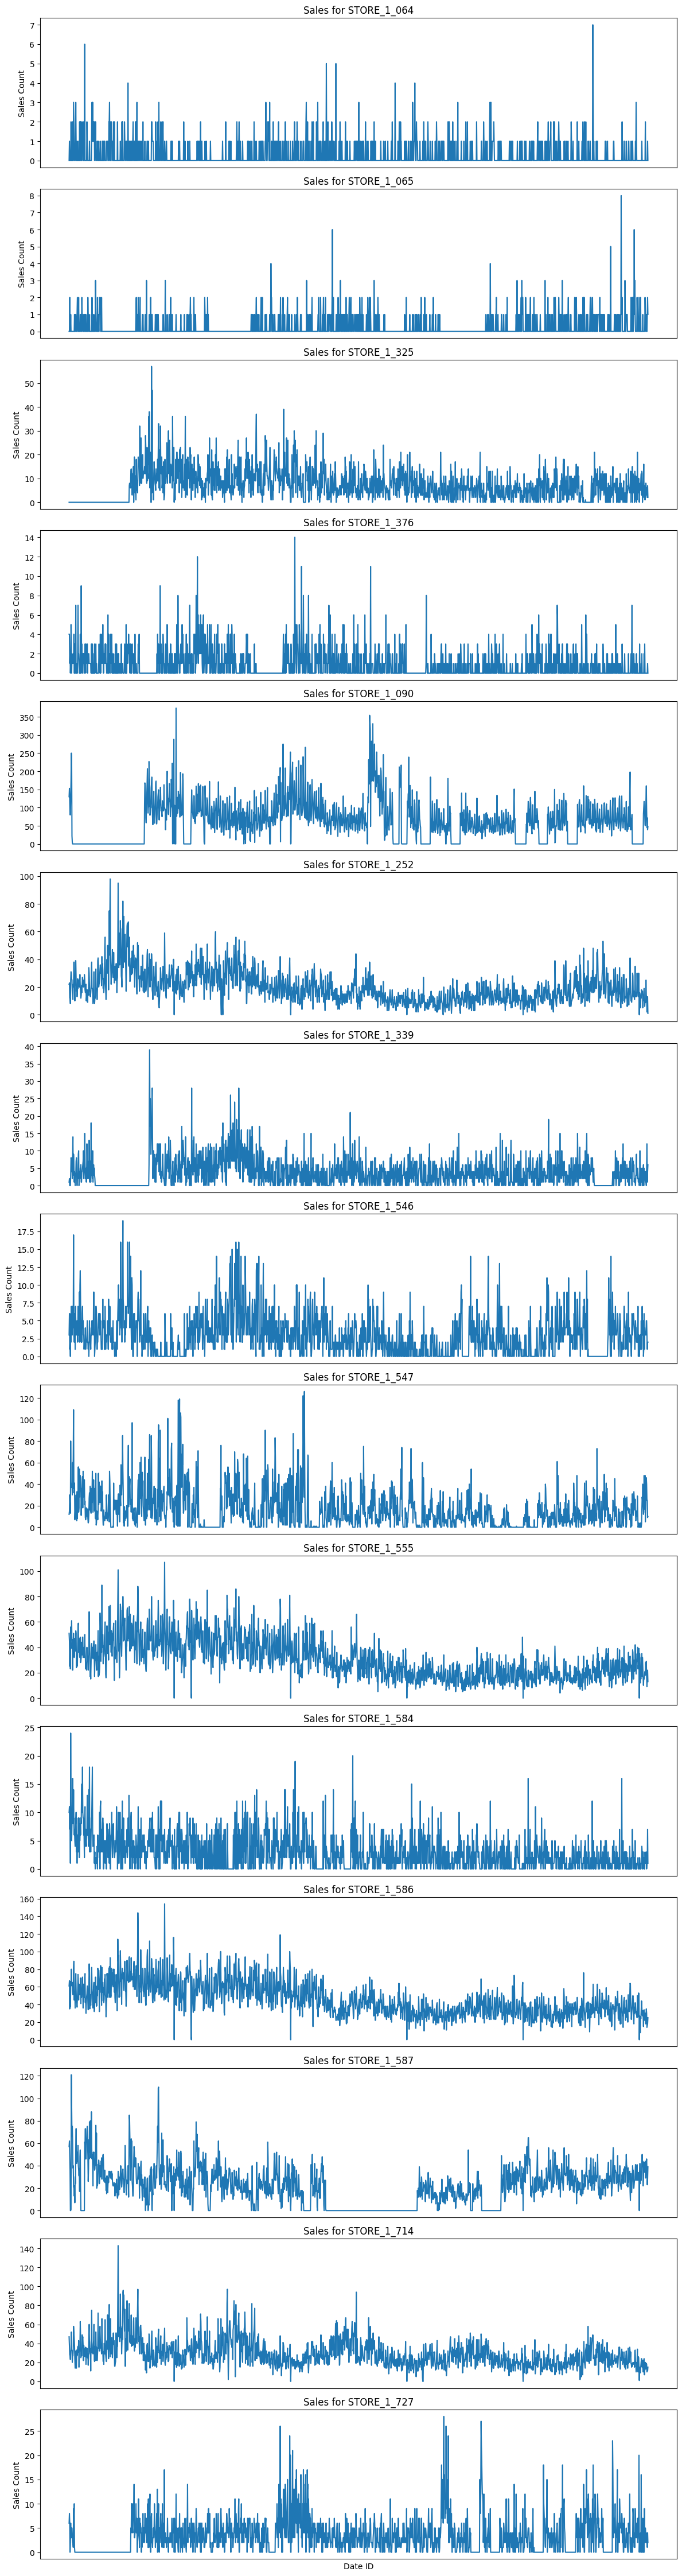

In [ ]:
# Plot sales for each item in subplots
unique_items = sales["item_id"].unique()
n_items = len(unique_items)
fig, axes = plt.subplots(n_items, 1, figsize=(12, 3 * n_items), sharex=True)

if n_items == 1:
    axes = [axes]

for ax, item in zip(axes, unique_items):
    item_sales = sales[sales["item_id"] == item]
    ax.plot(item_sales["date_id"], item_sales["cnt"])
    ax.set_title(f"Sales for {item}")
    ax.set_ylabel("Sales Count")
    ax.set_xticks([])

axes[-1].set_xlabel("Date ID")
plt.tight_layout()
plt.show()